In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math


ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

Сгенерируйте примеры из распределения

In [67]:
a = 1.99
gamma_rv = sts.cosine(a)

sample = gamma_rv.rvs(size=100)

# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.cosine()
#sample = cosine_rv.rvs(100)
sample

array([ 0.94304334,  1.1274562 ,  1.03533708,  0.81910598,  3.94685993,
        2.88288234,  0.69465973,  2.22210457,  0.66328468,  2.41070629,
        2.03387608,  1.75157204,  3.51844477,  0.03163895,  0.90759118,
        0.19576948,  3.15564585,  3.00117898,  3.06500777,  1.96560448,
        3.94692518,  1.88277057,  3.79272477,  1.3341407 ,  0.57608613,
        2.57767741,  1.51966037,  2.57311308,  3.76785692,  0.57898735,
        2.81404593,  3.93303021,  3.20791851,  0.57753704,  3.56352878,
        3.58724   ,  2.62367603,  1.883703  ,  1.18123572,  3.53119102,
        3.16650812,  1.49652803,  1.52238657,  2.41068826,  0.19479786,
        1.30749331,  2.8260171 ,  2.96858924,  2.77370987,  1.45968472,
        3.08054141,  0.81141063,  0.49763209,  0.39169168,  2.82985285,
        2.5298546 ,  3.00722167,  0.66965568,  2.89476392,  2.14294733,
        0.56085102,  3.02947713,  1.29088299,  3.0167345 ,  3.93438995,
        1.88970952,  2.25152903,  1.34579494,  2.47142886, -0.20

In [76]:
real_mean  = gamma_rv.mean()
real_mean

1.99

In [77]:
real_var = gamma_rv.var()
real_var

1.2898681336964528

Постройте гистограмму выборки и теоретическую плотность распределения


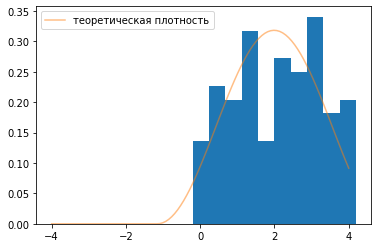

In [70]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [75]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

2.093457693844341
1.3551715514874425


Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [74]:
N = 50
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(gamma_rv.rvs(N)))

means = np.array(means).astype(np.float32)

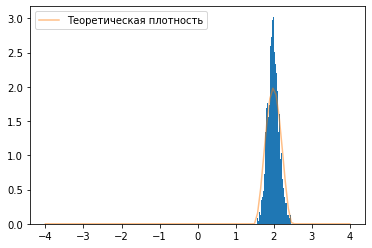

In [79]:
norm_rv = sts.cosine(loc=gamma_rv.mean(), scale=gamma_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(-4,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()


plt.show()

[]

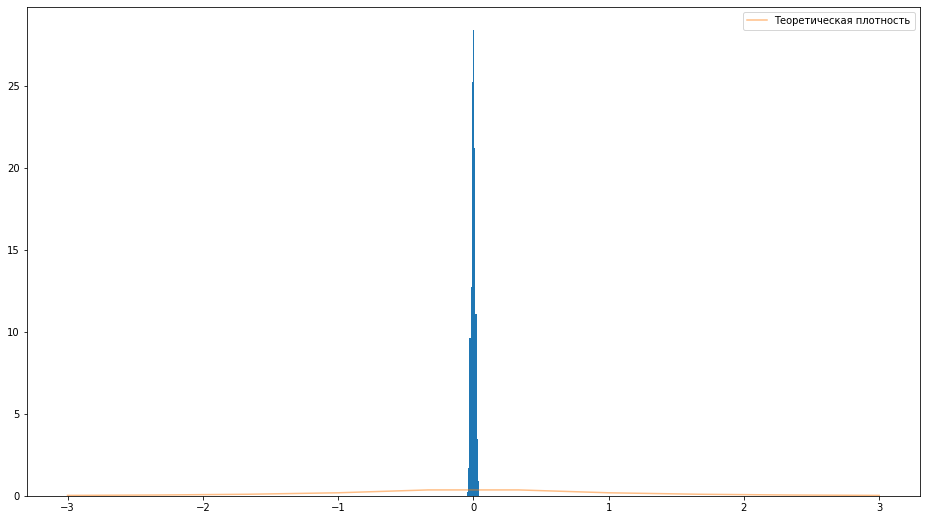

In [152]:
plt.figure(figsize=(16,9))
norm_rv = sts.gamma(a,loc=gamma_rv.mean(), scale=gamma_rv.std() / np.sqrt(10))
plt.hist(means, density=True)
x = np.linspace(-3,3, 10)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

(array([0.22750107, 0.34711504, 0.2497821 , 0.15948529, 0.08208802,
        0.06215235, 0.0246264 , 0.00938149, 0.00703612, 0.00351806]),
 array([0.0179434 , 0.87068664, 1.72342987, 2.57617311, 3.42891635,
        4.28165958, 5.13440282, 5.98714606, 6.83988929, 7.69263253,
        8.54537576]),
 [<matplotlib.patches.Polygon at 0x14e300e20>])

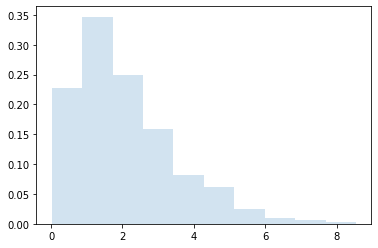

In [69]:
plt.hist(sample, density=True, histtype='stepfilled', alpha=0.2)



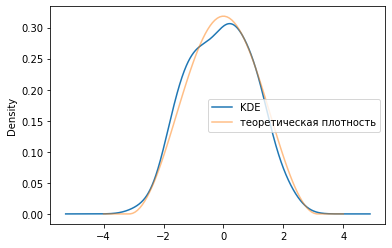

In [142]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

x = np.linspace(-4,4,100)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()